# TUTORIAL: Transfer Learning with ResNet50 for image classification

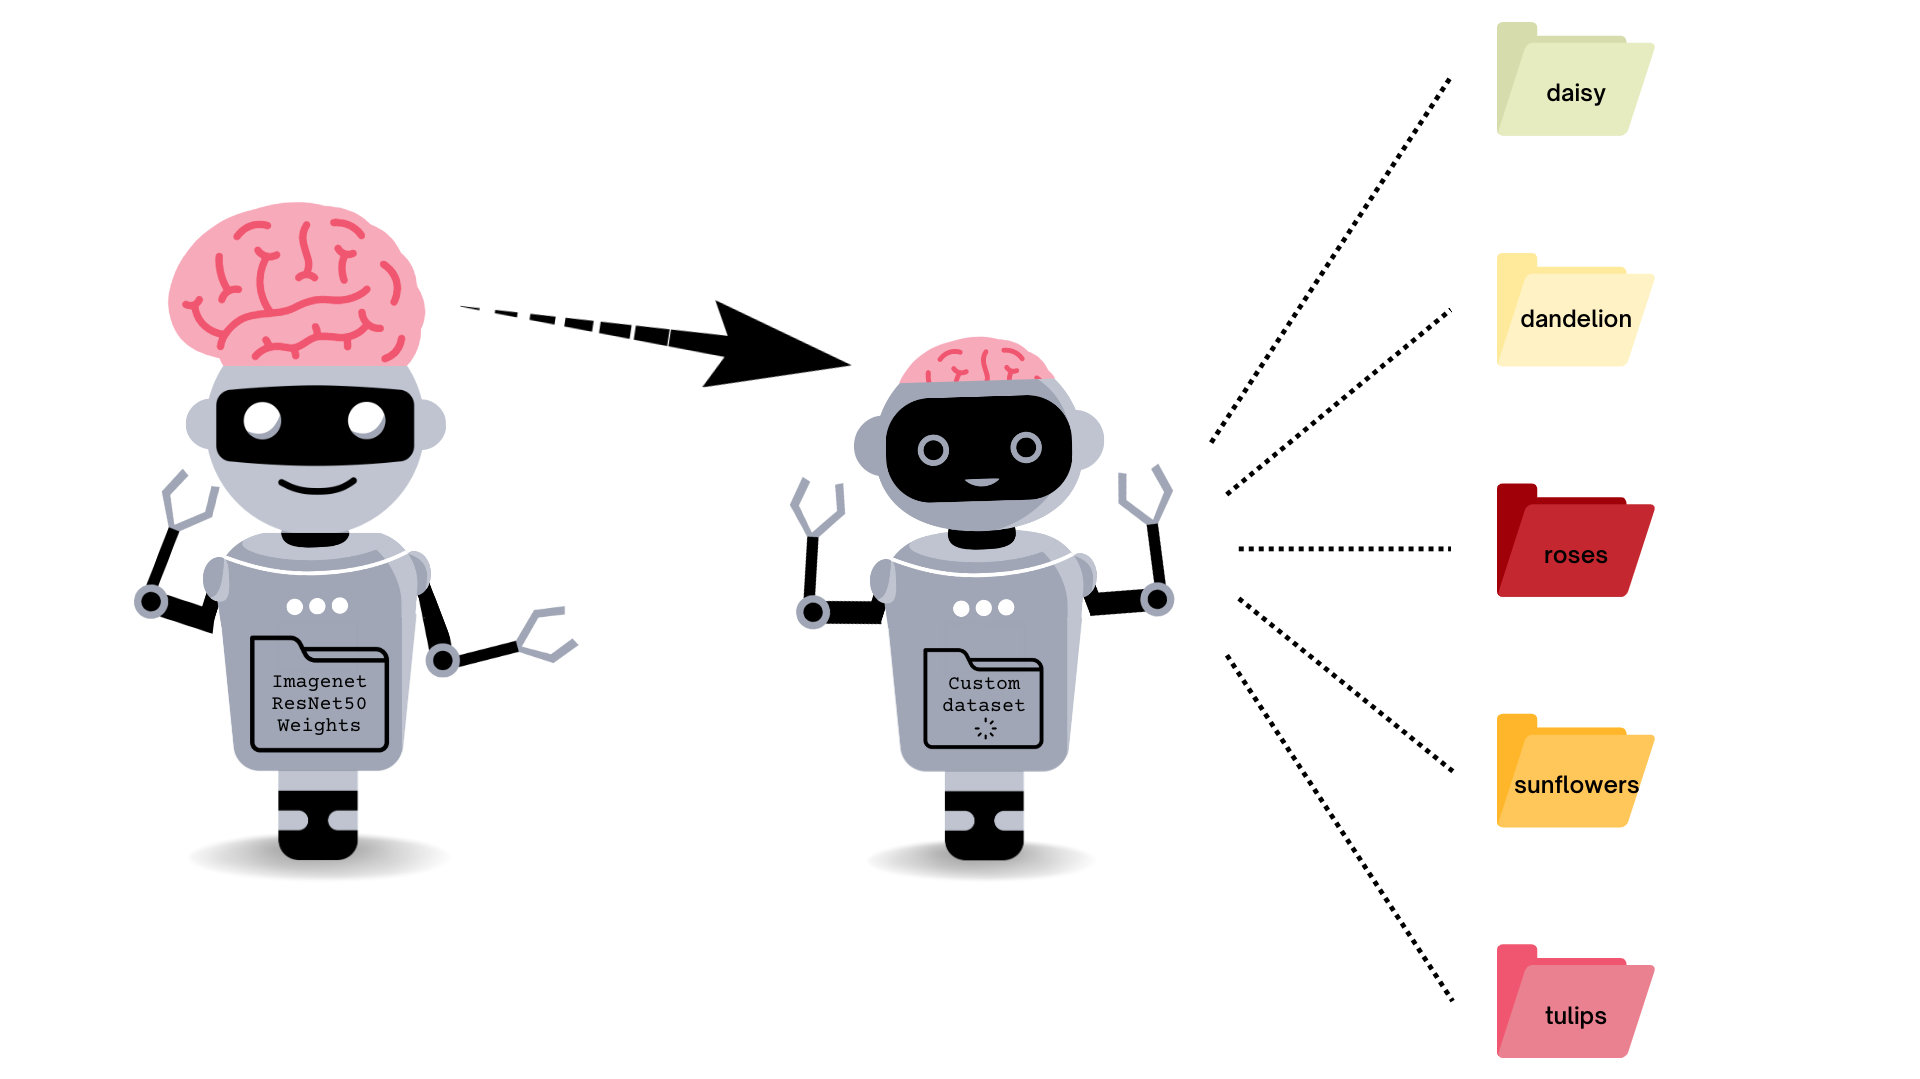

#### **USE CASE:** Flower Classification

To classify flower images, the **Flower Classification** dataset will be used. It is available on [Kaggle](https://www.kaggle.com/datasets/sauravagarwal/flower-classification).

>*Contains information from [Flower Classification](https://www.kaggle.com/datasets/sauravagarwal/flower-classification), which is made available here under the [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/).*

The dataset contains 5 types of flowers: 

1) **daisy**

2) **dandelion**

3) **roses**

4) **sunflowers**

5) **tulips**

The data is distributed as follows:

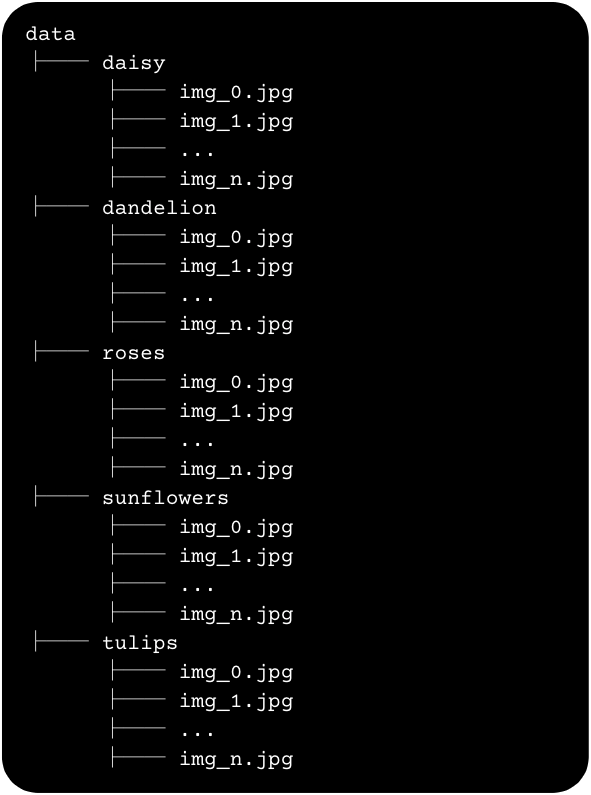

## Code

### Step 1 - Librairies installation and import

In [ ]:
# python librairies installation
!pip install split-folders opencv-python scipy

In [2]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

### Step 2 - Data preprocessing

To use your data (images), you have to pre-process them. 

#### 1. Visualize dataset images

The first step is to display an image of each class to see what it looks like.

Here, there is **5 classes** (for 5 flower types).

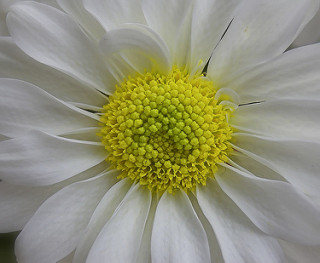

In [3]:
# daisy
img_daisy = image.load_img("/workspace/data-source/daisy/100080576_f52e8ee070_n.jpg")
img_daisy

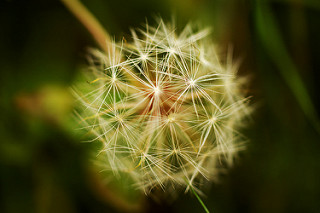

In [4]:
# dandelion
img_dandelion = image.load_img("/workspace/data-source/dandelion/10043234166_e6dd915111_n.jpg")
img_dandelion

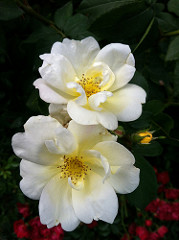

In [5]:
# roses
img_roses = image.load_img("/workspace/data-source/roses/10090824183_d02c613f10_m.jpg")
img_roses

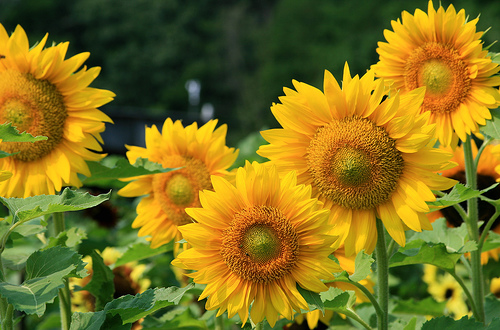

In [6]:
# sunflowers
img_sunflowers = image.load_img("/workspace/data-source/sunflowers/1008566138_6927679c8a.jpg")
img_sunflowers

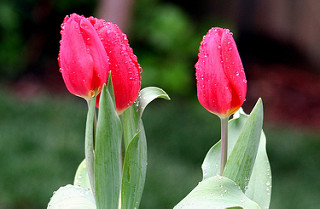

In [7]:
# tulips
img_tulips = image.load_img("/workspace/data-source/tulips/100930342_92e8746431_n.jpg")
img_tulips

#### 2. Split data to use a ResNet model

By using a **ResNet** model, your dataset has to be split as follow:

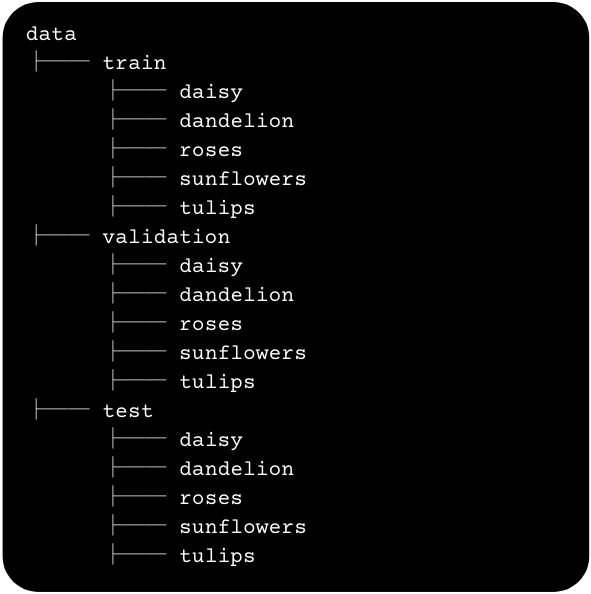

If this is not the case for your image classification dataset, follow the steps below.

1. Have a separate dataset as follows: **one folder per class**.

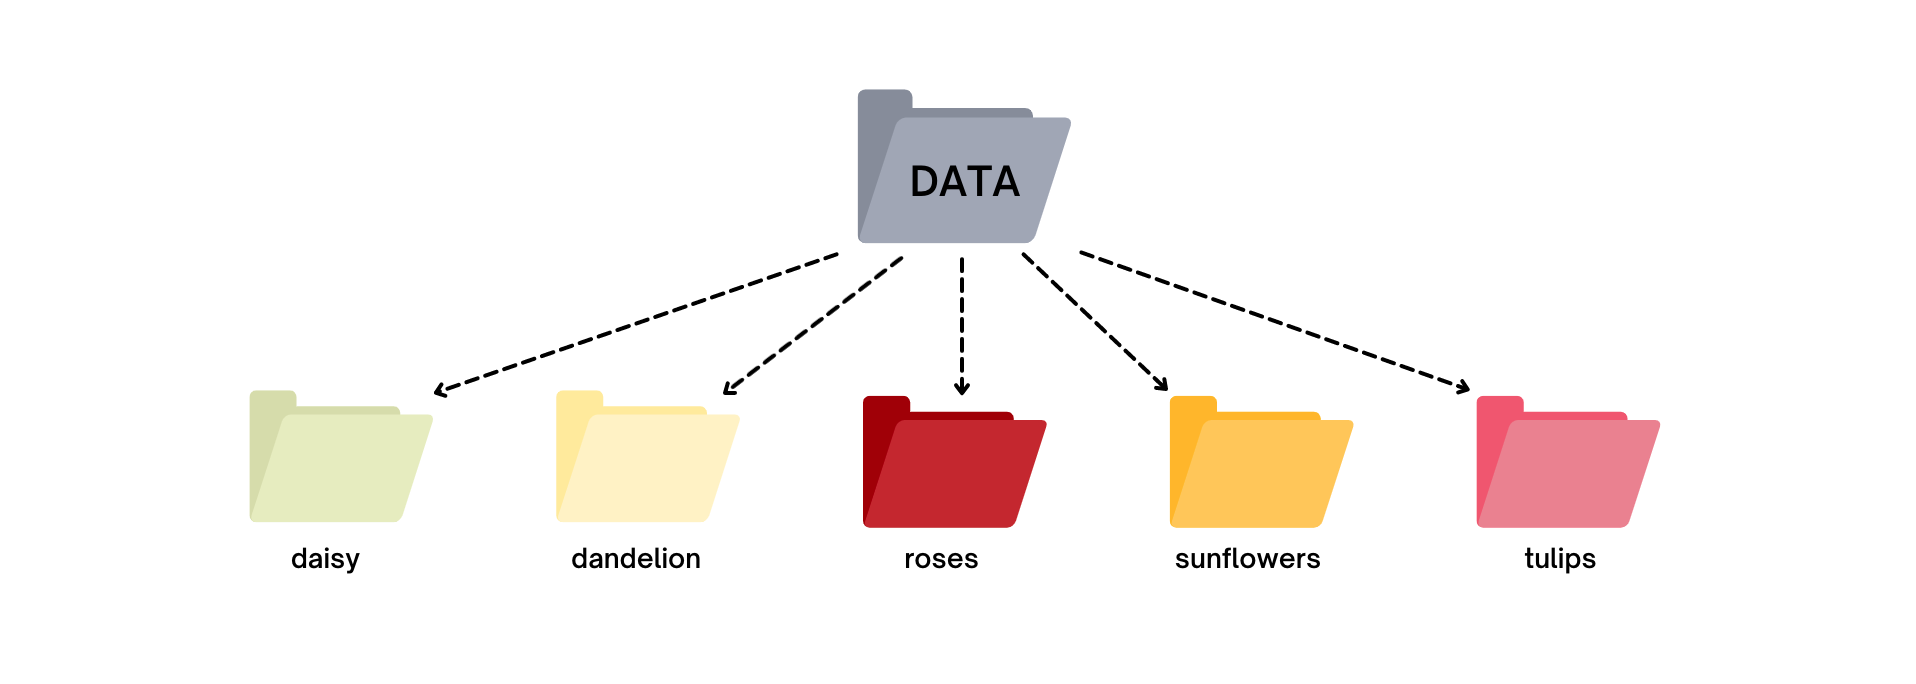

2. Then play the following cell to split the dataset into training, validation and test sets.

In [8]:
# split data in a new folder named data-split
splitfolders.ratio("/workspace/data-source", output="/workspace/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)

Copying files: 3670 files [00:18, 193.57 files/s]


Your data should, now, be split as follows:

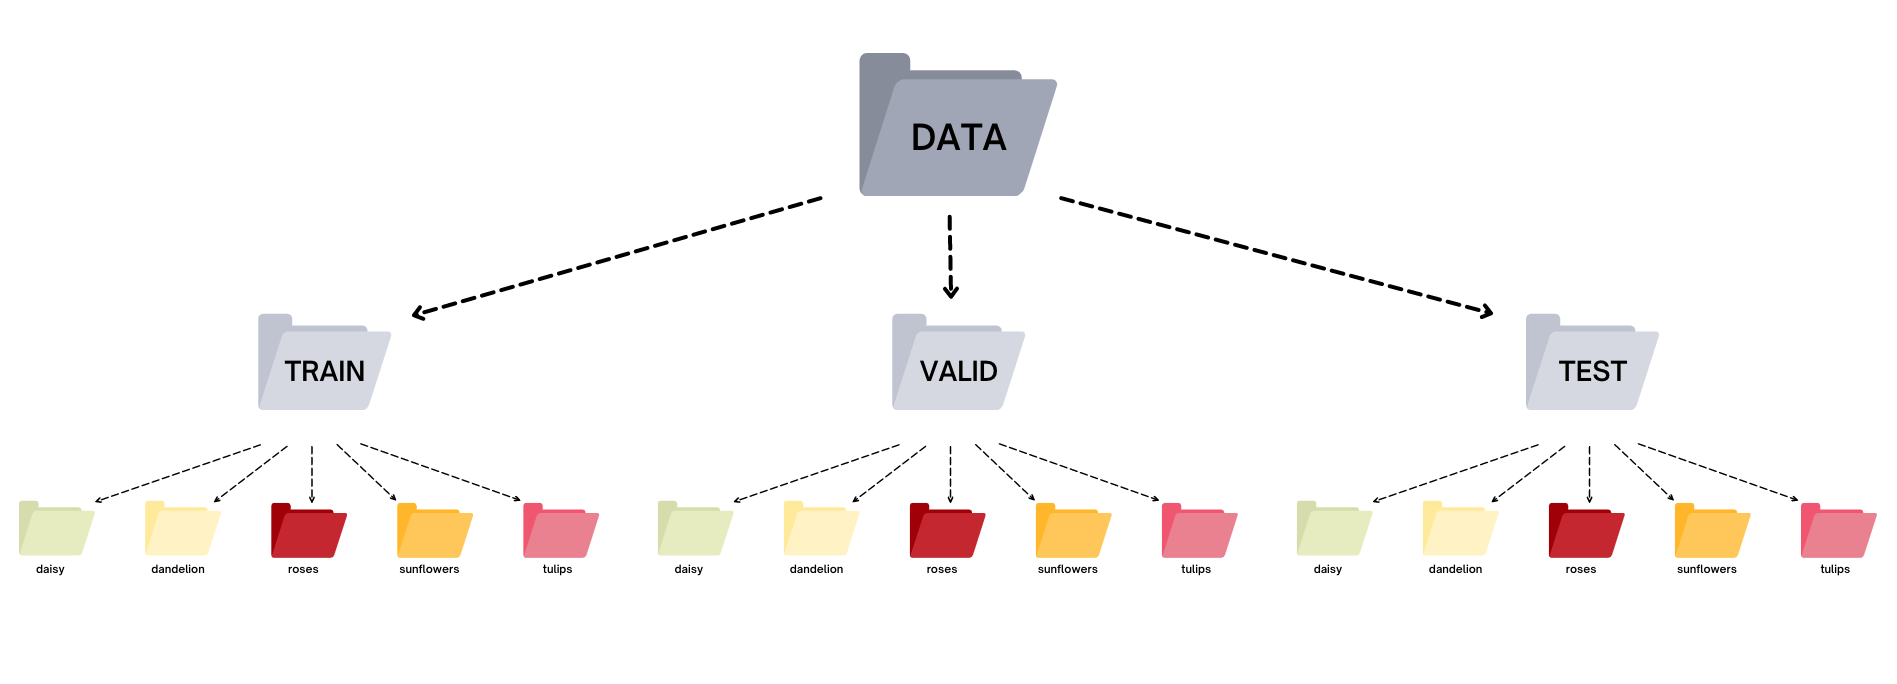

#### 3. Create Keras data generators

In [9]:
datagen = ImageDataGenerator()

In [10]:
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']

In [11]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="/workspace/data-split/train/", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="sparse", 
)

Found 2672 images belonging to 5 classes.


In [12]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="/workspace/data-split/val/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="sparse", 
)

Found 812 images belonging to 5 classes.


In [13]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="/workspace/data-split/test/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="sparse", 
)

Found 425 images belonging to 5 classes.


### Step 3 - Build the model

The first step is to build the model, using **ResNet50**.

In [ ]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [15]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

### Step 4 - Train the model

**Adam** optimizer is used to train the model on **1 epoch**. It is enough by using Transfer Learning.

The loss is calculated with the **sparse_categorical_crossentropy** function.

In [16]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

> Some warnings can appear, don't be afraid, you can execute the next steps of the notebook.

In [ ]:
# launch the training
model_history = trainModel(model = model, epochs = 1, optimizer = "Adam")

44/84 [==============>...............] - ETA: 13:42 - loss: 2.8038 - accuracy: 0.2544